In [1]:
import os, glob
import numpy
import matplotlib
import matplotlib.pyplot as plt

import iris
from qumpy_lite import *

from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics.pairwise import chi2_kernel
import numpy as np



%matplotlib inline

In [2]:
def get_index2(x, y):
    index2 = list()
    pos = 0
    for i in y:
        ii = x.index(i, pos)
        pos = ii
        index2.append(ii)
    return index2



In [3]:
if True:
    current = os.getcwd()
    parent = os.path.dirname(current)
    sys.path.insert(0, parent)
    from paths import *
else:
    from paths import *
    
searchstr = os.path.join(coupleddir, 'UK', 'histrcp8p5_%s_uk.nc')
cachedir = os.path.join(tempdir, 'cache', 'wt_jets')
figpath = os.path.join(plotdir, 'paper_ukwinter_precip')
jets_dir = os.path.join(coupleddir, 'jets', 'gcm_jets')



In parent directory


In [4]:

# !ls {wt_dir}

# fwt = sorted(glob.glob(os.path.join(wt_dir, '*.nc')))
fwt = os.path.join(wt_dir, 'decider_classification_8_clusters_r001i1p*.nc')
             
wtypes = iris.load_cube(fwt)
add_yyyymmdd(wtypes, 'time')
iris.coord_categorisation.add_season_year(wtypes, 'time')
iris.coord_categorisation.add_month_number(wtypes, 'time')
wtypes.coord('time').bounds = None
wtypes = wtypes.extract(iris.Constraint(month_number=[12, 1, 2]))

print(wtypes)

common_yyyymmdd = wtypes.coord('yyyymmdd').points
yyyymm = [ymd[:6] for ymd in common_yyyymmdd]



/opt/miniconda3/envs/py3_iris/lib/python3.8/site-packages/iris/fileformats/_nc_load_rules/helpers.py:223: UnknownCellMethodWarning: NetCDF variable 'air_pressure_at_sea_level' contains unknown cell method 'classify'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)
/opt/miniconda3/envs/py3_iris/lib/python3.8/site-packages/iris/fileformats/_nc_load_rules/helpers.py:223: UnknownCellMethodWarning: NetCDF variable 'air_pressure_at_sea_level' contains unknown cell method 'classify'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)
/opt/miniconda3/envs/py3_iris/lib/python3.8/site-packages/iris/fileformats/_nc_load_rules/helpers.py:223: UnknownCellMethodWarning: NetCDF variable 'air_pressure_at_sea_level' contains unknown cell method 'classify'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)
/opt/miniconda3/envs/py3_iris/lib/python3.8/site-packages/iris/fileformats/_nc_load_rules/helpers.py:223: UnknownCellMethodWarning: NetCDF variable 'air_pressur

air_pressure_at_sea_level / (1)     (realization: 20; time: 18000)
    Dimension coordinates:
        realization                             x         -
        time                                    -         x
    Auxiliary coordinates:
        day                                     -         x
        month                                   -         x
        month_number                            -         x
        season_year                             -         x
        year                                    -         x
        yyyymmdd                                -         x
    Scalar coordinates:
        forecast_reference_time     1896-12-01 00:00:00
        latitude                    52.5 degrees, bound=(32.5, 72.5) degrees
        longitude                   -5.0 degrees, bound=(-32.5, 22.5) degrees
    Cell methods:
        mean                        time (1 hour)
        classify                    latitude, longitude
    Attributes:
        Conventions     

In [5]:
!ls /Users/davidsexton/Data/hadgem3/coupled/Fereday_clustering/daily_analysis_updated30/

decider_classification_30_clusters_r001i1p00000.nc
decider_classification_30_clusters_r001i1p00090.nc
decider_classification_30_clusters_r001i1p00605.nc
decider_classification_30_clusters_r001i1p00834.nc
decider_classification_30_clusters_r001i1p01113.nc
decider_classification_30_clusters_r001i1p01554.nc
decider_classification_30_clusters_r001i1p01649.nc
decider_classification_30_clusters_r001i1p01843.nc
decider_classification_30_clusters_r001i1p01935.nc
decider_classification_30_clusters_r001i1p02089.nc
decider_classification_30_clusters_r001i1p02123.nc
decider_classification_30_clusters_r001i1p02242.nc
decider_classification_30_clusters_r001i1p02305.nc
decider_classification_30_clusters_r001i1p02335.nc
decider_classification_30_clusters_r001i1p02491.nc
decider_classification_30_clusters_r001i1p02753.nc
decider_classification_30_clusters_r001i1p02832.nc
decider_classification_30_clusters_r001i1p02868.nc
decider_classification_30_clusters_r001i1p02884.nc
decider_classification_30_clust

In [6]:
wt_dir30 = wt_dir.replace('updated', 'updated30')
fwt = os.path.join(wt_dir30, 'decider_classification_30_clusters_r001i1p*.nc')
             
wtypes30 = iris.load_cube(fwt)
add_yyyymmdd(wtypes30, 'time')
iris.coord_categorisation.add_season_year(wtypes30, 'time')
iris.coord_categorisation.add_month_number(wtypes30, 'time')
wtypes30.coord('time').bounds = None
wtypes30 = wtypes30.extract(iris.Constraint(month_number=[12, 1, 2]))





/opt/miniconda3/envs/py3_iris/lib/python3.8/site-packages/iris/fileformats/_nc_load_rules/helpers.py:223: UnknownCellMethodWarning: NetCDF variable 'air_pressure_at_sea_level' contains unknown cell method 'classify'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)
/opt/miniconda3/envs/py3_iris/lib/python3.8/site-packages/iris/fileformats/_nc_load_rules/helpers.py:223: UnknownCellMethodWarning: NetCDF variable 'air_pressure_at_sea_level' contains unknown cell method 'classify'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)
/opt/miniconda3/envs/py3_iris/lib/python3.8/site-packages/iris/fileformats/_nc_load_rules/helpers.py:223: UnknownCellMethodWarning: NetCDF variable 'air_pressure_at_sea_level' contains unknown cell method 'classify'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)
/opt/miniconda3/envs/py3_iris/lib/python3.8/site-packages/iris/fileformats/_nc_load_rules/helpers.py:223: UnknownCellMethodWarning: NetCDF variable 'air_pressur

In [7]:
KEEP = [1100000, 1100605, 1100834, 1101113, 1101554, 1101649,
        1101843, 1101935, 1102123, 1102242, 1102305, 1102335,
        1102491, 1102832, 1102868]
# KEEP = [1100000 + int(rip[-5:]) for rip in ALLOWED_RIPS]
print(KEEP, len(KEEP))

iok = [wtypes.coord('realization').points.tolist().index(kk) for kk in KEEP]
iok, len(iok)

wtypes = wtypes[iok]
wtypes30 = wtypes30[iok]

[1100000, 1100605, 1100834, 1101113, 1101554, 1101649, 1101843, 1101935, 1102123, 1102242, 1102305, 1102335, 1102491, 1102832, 1102868] 15


In [18]:
# def middle_string(x, sep='|'):
#     xs = x.split(sep)
#     ns = len(xs)
#     return xs[ns / 2]

# jetlat = iris.load_cube('/Users/davidsexton/Data/hadgem3/coupled/jets/gcm_jets/gcm_jet_lats_r001i1p*.nc')
# print jetlat
# new_yyyymmdd = jetlat.coord('yyyymmdd').copy(points=[middle_string(p) for p in jetlat.coord('yyyymmdd').points])
# jetlat.replace_coord(new_yyyymmdd)

# jetlat = iris.load_cube('/Users/davidsexton/Temp/jet_lat.nc')
# fjetlat = os.path.join(tempdir, 'jetlat.nc')
# fjetstr = os.path.join(tempdir, 'jetstr.nc')

# jetlat = iris.load_cube(fjetlat)
# jetstr = iris.load_cube(fjetstr)


jetlat = iris.load_cube(os.path.join(cachedir, 'jets_djf.nc'), 'jet latitude')
jetstr = iris.load_cube(os.path.join(cachedir, 'jets_djf.nc'), 'jet strength')


jok = [jetlat.coord('realization').points.tolist().index(kk) for kk in KEEP]
jok, len(jok)
jetlat = jetlat[jok]
jetstr = jetstr[jok]




print(jetlat.coord('yyyymmdd').points[:10])

['19000101' '19000102' '19000103' '19000104' '19000105' '19000106'
 '19000107' '19000108' '19000109' '19000110']


In [19]:
print(jetlat.coord('yyyymmdd').points[:10])
print(wtypes.coord('yyyymmdd').points[:10])
print(wtypes, jetlat)

common_yyyymmdd = sorted(set(wtypes.coord('yyyymmdd').points.tolist()).intersection(jetlat.coord('yyyymmdd').points))
print(len(common_yyyymmdd))
print(common_yyyymmdd[:10])
print(get_index2(jetlat.coord('yyyymmdd').points.tolist(), common_yyyymmdd)[-1])
print(jetlat.shape, wtypes.shape)

jetlat_ = jetlat[:,get_index2(jetlat.coord('yyyymmdd').points.tolist(), common_yyyymmdd)]
wtypes_ = wtypes[:,get_index2(wtypes.coord('yyyymmdd').points.tolist(), common_yyyymmdd)]

wtypes_, jetlat_

# plot_composite(cube, 1, [0, 47.5], title='NAO- (southern jet)')
# plt.subplot(223)
# plot_composite(cube, 1, [47.5, 57.5], title='NAO- (central jet)')
# plt.subplot(224)
# plot_composite(cube, 1, [57.5, 90], title='NAO- (northern jet)')



['19000101' '19000102' '19000103' '19000104' '19000105' '19000106'
 '19000107' '19000108' '19000109' '19000110']
['18991201' '18991202' '18991203' '18991204' '18991205' '18991206'
 '18991207' '18991208' '18991209' '18991210']
air_pressure_at_sea_level / (1)     (realization: 15; time: 18000)
    Dimension coordinates:
        realization                             x         -
        time                                    -         x
    Auxiliary coordinates:
        day                                     -         x
        month                                   -         x
        month_number                            -         x
        season_year                             -         x
        year                                    -         x
        yyyymmdd                                -         x
    Scalar coordinates:
        forecast_reference_time     1896-12-01 00:00:00
        latitude                    52.5 degrees, bound=(32.5, 72.5) degrees
        longitud

(<iris 'Cube' of air_pressure_at_sea_level / (1) (realization: 15; time: 17970)>,
 <iris 'Cube' of jet latitude / (degrees) (realization: 15; time: 17970)>)

air_pressure_at_sea_level / (1)     (realization: 15; time: 17970)
    Dimension coordinates:
        realization                             x         -
        time                                    -         x
    Auxiliary coordinates:
        day                                     -         x
        month                                   -         x
        month_number                            -         x
        season_year                             -         x
        year                                    -         x
        yyyymmdd                                -         x
    Scalar coordinates:
        forecast_reference_time     1896-12-01 00:00:00
        latitude                    52.5 degrees, bound=(32.5, 72.5) degrees
        longitude                   -5.0 degrees, bound=(-32.5, 22.5) degrees
    Cell methods:
        mean                        time (1 hour)
        classify                    latitude, longitude
    Attributes:
        Conventions     

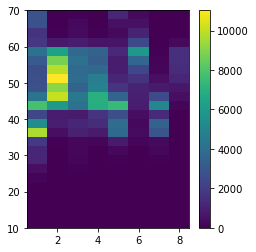

In [20]:
print(wtypes_, jetlat_)
xbin = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]
ybin = numpy.linspace(10, 70, num=25)
bin2d, x_edge, y_edge, binnumber = scipy.stats.binned_statistic_2d(wtypes_.data.ravel(), jetlat_.data.ravel(), None, statistic='count',
                                                                   bins=(xbin, ybin))

x0 = (x_edge[1:] + x_edge[:-1]) * 0.5
y0 = (y_edge[1:] + y_edge[:-1]) * 0.5

vmax = bin2d.max()

fig = plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.pcolormesh(x_edge, y_edge, bin2d.T, vmin=0, vmax=vmax)
plt.colorbar()



In [21]:
jetstr_ = jetstr[:,get_index2(jetstr.coord('yyyymmdd').points.tolist(), common_yyyymmdd)]



[10.  12.5 15.  17.5 20.  22.5 25.  27.5 30.  32.5 35.  37.5 40.  42.5
 45.  47.5 50.  52.5 55.  57.5 60.  62.5 65.  67.5 70. ]
(15, 17970)
(15, 17970)
(15, 17970)
(15, 17970)
(15, 17970)
(15, 17970)
(15, 17970)
(15, 17970)


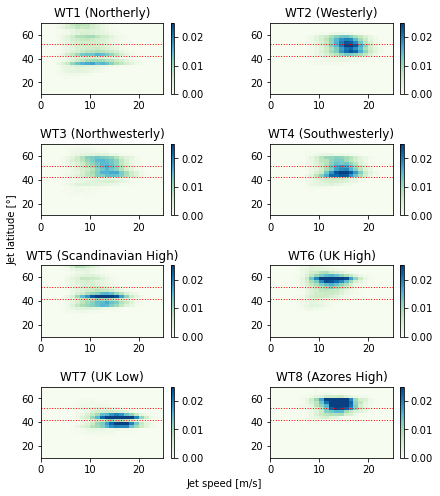

In [22]:
WT_names_dict = {'WT1':'Northerly',
                 'WT2':'Westerly',
                 'WT3':'Northwesterly',
                 'WT4':'Southwesterly',
                 'WT5':'Scandinavian High',
                 'WT6':'UK High',
                 'WT7':'UK Low',
                 'WT8':'Azores High'}

##### latbin = numpy.linspace(25, 75, num=21)
latbin = ybin
print(latbin)
strbin = numpy.linspace(0, 25, num=26)

fig = plt.figure(figsize=(174/25.4, 8))
plt.subplots_adjust(wspace=0.5, hspace=0.7)
for wt in [1, 2, 3, 4, 5, 6, 7, 8]:
    wt_titl='WT%.1i' % wt
    plt.subplot(4, 2, wt)
    index = numpy.where(wtypes_.data == wt)
    print(wtypes_.shape)
    # jetlat_.data[index].shape
    freq, _x, _y, _binnumber = scipy.stats.binned_statistic_2d(jetlat_.data[index], jetstr_.data[index], jetstr_.data[index],
                                                                                       bins=(latbin, strbin),
                                                                                       statistic='count')

    vmax, lw = 0.025, 1
    freq /= freq.sum()

    plt.pcolormesh(_y, _x, freq, vmin=0, vmax=vmax, cmap='GnBu')
    plt.axhline(y=42, color='r', linestyle=':', linewidth=lw)
    plt.axhline(y=52, color='r', linestyle=':', linewidth=lw)
    plt.title('%s (%s)' % (wt_titl, WT_names_dict[wt_titl]))
    plt.colorbar()
    if wt == 5:
        plt.ylabel(u'Jet latitude [\xb0]', y=1.5)#, loc='top')
    if wt == 7:
        plt.xlabel('Jet speed [m/s]', x=1.5)

    
fig.savefig(os.path.join(figpath, 'Wtype_clusters_jet_v_wt_full_period.png'), dpi=300)
fig.savefig(os.path.join(figpath, 'Fig6.png'), dpi=300, facecolor='w')
fig.savefig(os.path.join(figpath, 'Fig6.tiff'), dpi=300, facecolor='w')



